In [1]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ROOT_DIR = "data"

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train_cleaned.csv"))

In [3]:
#장비 구분
df = train_data.copy()
eq1 = df[(df['Equipment_Dam'] == 'Dam dispenser #1') & (df['Equipment_Fill1'] == 'Fill1 dispenser #1') & (df['Equipment_Fill2'] == 'Fill2 dispenser #1')]
eq2 = df[(df['Equipment_Dam'] == 'Dam dispenser #2') & (df['Equipment_Fill1'] == 'Fill1 dispenser #2') & (df['Equipment_Fill2'] == 'Fill2 dispenser #2')]

In [4]:
column = []
for i in eq1.columns:
    if (eq1[i].nunique() == 1) and (eq1[i].isnull().sum() == 0):
        print(i)
        column.append(i)
eq1.drop(column, axis=1, inplace=True)

Equipment_Dam
CURE END POSITION X Collect Result_Dam
CURE END POSITION Z Collect Result_Dam
CURE END POSITION ? Collect Result_Dam
CURE START POSITION X Collect Result_Dam
Equipment_Fill1
Equipment_Fill2
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2
HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2


C:\Users\kushn\AppData\Local\Temp\ipykernel_14856\1868893893.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq1.drop(column, axis=1, inplace=True)


In [5]:
column2 = []
for i in eq2.columns:
    if (eq2[i].nunique() == 1) and (eq2[i].isnull().sum() == 0):
        print(i)
        column2.append(i)
eq2.drop(column2, axis=1, inplace=True)

Equipment_Dam
CURE END POSITION X Collect Result_Dam
CURE END POSITION Z Collect Result_Dam
CURE END POSITION ? Collect Result_Dam
CURE START POSITION X Collect Result_Dam
Equipment_Fill1
Equipment_Fill2
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2
HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2


C:\Users\kushn\AppData\Local\Temp\ipykernel_14856\166094028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq2.drop(column2, axis=1, inplace=True)


In [6]:
num = 0
for i in eq1.columns:
    print(num, i)
    num += 1

0 Model.Suffix
1 CURE SPEED Collect Result_Dam
2 DISCHARGED SPEED OF RESIN Collect Result_Dam
3 DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
4 DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
5 DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
6 Dispense Volume(Stage1) Collect Result_Dam
7 Dispense Volume(Stage2) Collect Result_Dam
8 Dispense Volume(Stage3) Collect Result_Dam
9 HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
10 HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
11 HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
12 HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
13 HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
14 HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam
15 HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam
16 Head Clean Position Z Collect Result_Dam
17 Head Purge Position Z Collect Result_Dam
18 Head Zero Position Y Collect Result_Dam
19 Head Zero Position Z Collect Result_Dam
20 Machine Tact 

In [7]:
num = 0
for i in eq2.columns:
    print(num, i)
    num += 1

0 Model.Suffix
1 CURE SPEED Collect Result_Dam
2 DISCHARGED SPEED OF RESIN Collect Result_Dam
3 DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
4 DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
5 DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
6 Dispense Volume(Stage1) Collect Result_Dam
7 Dispense Volume(Stage2) Collect Result_Dam
8 Dispense Volume(Stage3) Collect Result_Dam
9 HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
10 HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
11 HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
12 HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
13 HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
14 HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam
15 HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam
16 Head Clean Position Z Collect Result_Dam
17 Head Purge Position Z Collect Result_Dam
18 Head Zero Position Y Collect Result_Dam
19 Head Zero Position Z Collect Result_Dam
20 Machine Tact 

In [8]:
# 'Stage1 Line1 Distance Speed Collect Result_Dam' : 'Stage3 Line4 Distance Speed Collect Result_Dam'
eq1_copy = eq1.copy()
eq1_copy.columns = eq1_copy.columns.str.replace('Distance Speed Collect Result_Dam', '')
eq1_copy.columns = eq1_copy.columns.str.replace('Stage', 'Stg')
eq1_copy.columns = eq1_copy.columns.str.replace('Line', 'L')
eq1_copy.columns = eq1_copy.columns.str.replace('Circle', 'C')
column1 = []
for i in eq1_copy.columns[24 : 34]:
    column1.append(i)
    print(eq1_copy[i].unique())
eq1_copy.groupby(column1)['target'].value_counts()

[5800 6500 6000 4000 6200 9000 5000 7000]
[5600 6500 6000 5800 4000 6200 9000 5000 7000]
[5800 6500 6000 4000 6200 9000 5000]
[ 5300  6500  5500  4000  8000  6000  5000 12000  9000]
[ 5300  6500  5500  4000  8000  5000 12000  9000]
[ 5300  6500  5500  4000  8000  6000  5000  5800 12000  9000]
[ 5300  6500  5500  4000  8000  5000 12000  9000]
[5800 6500 6000 4000 6200 9000 5000 7000]
[5800 6500 6000 4000 6200 9000 5000 7000]
[5800 6500 6000 4000 6200 9000 5000]


Stg1 L1   Stg1 L3   Stg1 L4   Stg2 C1   Stg2 L1   Stg2 L2   Stg2 L3   Stg3 L1   Stg3 L3   Stg3 L4   target  
4000      4000      4000      4000      4000      4000      4000      4000      4000      4000      Normal      1929
                                                                                                    AbNormal      52
                              5000      5000      5000      5000      4000      4000      4000      Normal       666
                                                                                                    AbNormal      29
                              8000      8000      8000      8000      4000      4000      4000      Normal       211
                                                                                                    AbNormal      16
                              9000      9000      9000      9000      4000      4000      4000      Normal       174
                                                                        

In [9]:
eq2_copy = eq2.copy()
eq2_copy.columns = eq2_copy.columns.str.replace('Distance Speed Collect Result_Dam', '')
eq2_copy.columns = eq2_copy.columns.str.replace('Stage', 'Stg')
eq2_copy.columns = eq2_copy.columns.str.replace('Line', 'L')
eq2_copy.columns = eq2_copy.columns.str.replace('Circle', 'C')
#column = []
for i in eq2_copy.columns[24 : 34]:
    print(eq2_copy[i].unique())
eq2_copy.groupby(column1)['target'].value_counts()

[ 5800  6500  4000  6000  6200 13000  5000  9000]
[5800 6500 4000 6000 5600 6200 5000 9000]
[5800 6500 4000 6000 6200 5000 9000]
[ 5300  6500  5500  4000  8000  5000 12000  6000  9000]
[ 5300  5500  4000  8000  6500  5000 12000 13000  9000]
[ 5300  6500  5500  4000  8000  5000  5800 12000  6000  9000]
[ 5300  5500  4000  8000  6500  5000  6000 12000  9000]
[5800 6500 4000 6000 6200 5000 9000]
[5800 6500 4000 6000 6200 5000 9000]
[5800 6500 4000 6000 6200 5000 9000]


Stg1 L1   Stg1 L3   Stg1 L4   Stg2 C1   Stg2 L1   Stg2 L2   Stg2 L3   Stg3 L1   Stg3 L3   Stg3 L4   target  
4000      4000      4000      4000      4000      4000      4000      4000      4000      4000      Normal      1915
                                                                                                    AbNormal     110
                              5000      5000      5000      5000      4000      4000      4000      Normal       628
                                                                                                    AbNormal      22
                              8000      8000      8000      8000      4000      4000      4000      Normal       201
                                                                                                    AbNormal      12
                              9000      9000      9000      9000      4000      4000      4000      Normal       158
                                                                        

In [10]:
df_copy = df.copy() 
df_copy.columns = df_copy.columns.str.replace('Distance Speed Collect Result_Dam', '')
df_copy.columns = df_copy.columns.str.replace('Stage', 'Stg')
df_copy.columns = df_copy.columns.str.replace('Line', 'L')
df_copy.columns = df_copy.columns.str.replace('Circle', 'C')
column = []
for i in df_copy.columns[29 : 39]:
    column.append(i)

df_copy.groupby(column)['target'].value_counts()

Stg1 L1   Stg1 L3   Stg1 L4   Stg2 C1   Stg2 L1   Stg2 L2   Stg2 L3   Stg3 L1   Stg3 L3   Stg3 L4   target  
4000      4000      4000      4000      4000      4000      4000      4000      4000      4000      Normal      3844
                                                                                                    AbNormal     164
                              5000      5000      5000      5000      4000      4000      4000      Normal      1294
                                                                                                    AbNormal      57
                              8000      8000      8000      8000      4000      4000      4000      Normal       412
                                                                                                    AbNormal      28
                              9000      9000      9000      9000      4000      4000      4000      Normal       332
                                                                        

In [11]:
num = 0
for i in df.columns:
    print(num, i)
    num += 1

0 Equipment_Dam
1 Model.Suffix
2 CURE END POSITION X Collect Result_Dam
3 CURE END POSITION Z Collect Result_Dam
4 CURE END POSITION ? Collect Result_Dam
5 CURE SPEED Collect Result_Dam
6 CURE START POSITION X Collect Result_Dam
7 DISCHARGED SPEED OF RESIN Collect Result_Dam
8 DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
9 DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
10 DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
11 Dispense Volume(Stage1) Collect Result_Dam
12 Dispense Volume(Stage2) Collect Result_Dam
13 Dispense Volume(Stage3) Collect Result_Dam
14 HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
15 HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
16 HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
17 HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
18 HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
19 HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam
20 HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam
21 

In [12]:
df[['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2', 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2', 'target']].value_counts()

HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2  HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2  target  
156.0                                                       243.7                                                       Normal      23545
694.0                                                       243.5                                                       Normal      13759
156.0                                                       243.7                                                       AbNormal     1481
692.8                                                       243.5                                                       Normal        852
694.0                                                       243.5                                                       AbNormal      825
692.8                                                       243.5                                                       AbNormal       44
dtype: int64

In [13]:
eq1[['Head Purge Position Z Collect Result_Fill2', 'target']].value_counts()

Head Purge Position Z Collect Result_Fill2  target  
85.000                                      Normal      21042
114.612                                     Normal       2503
85.000                                      AbNormal     1348
114.612                                     AbNormal      118
dtype: int64

In [14]:
eq2[['Head Purge Position Z Collect Result_Fill2', 'target']].value_counts()

Head Purge Position Z Collect Result_Fill2  target  
85.000                                      Normal      12355
114.612                                     Normal       2256
85.000                                      AbNormal      708
114.612                                     AbNormal      142
dtype: int64

In [15]:
eq2_copy[['HEAD NORMAL COORDINATE X AXIS(Stg3) Collect Result_Fill2','Head Purge Position Z Collect Result_Fill2', 'target']].value_counts()

HEAD NORMAL COORDINATE X AXIS(Stg3) Collect Result_Fill2  Head Purge Position Z Collect Result_Fill2  target  
694.0                                                     85.000                                      Normal      12355
                                                          114.612                                     Normal       1404
692.8                                                     114.612                                     Normal        852
694.0                                                     85.000                                      AbNormal      708
                                                          114.612                                     AbNormal       99
692.8                                                     114.612                                     AbNormal       43
dtype: int64

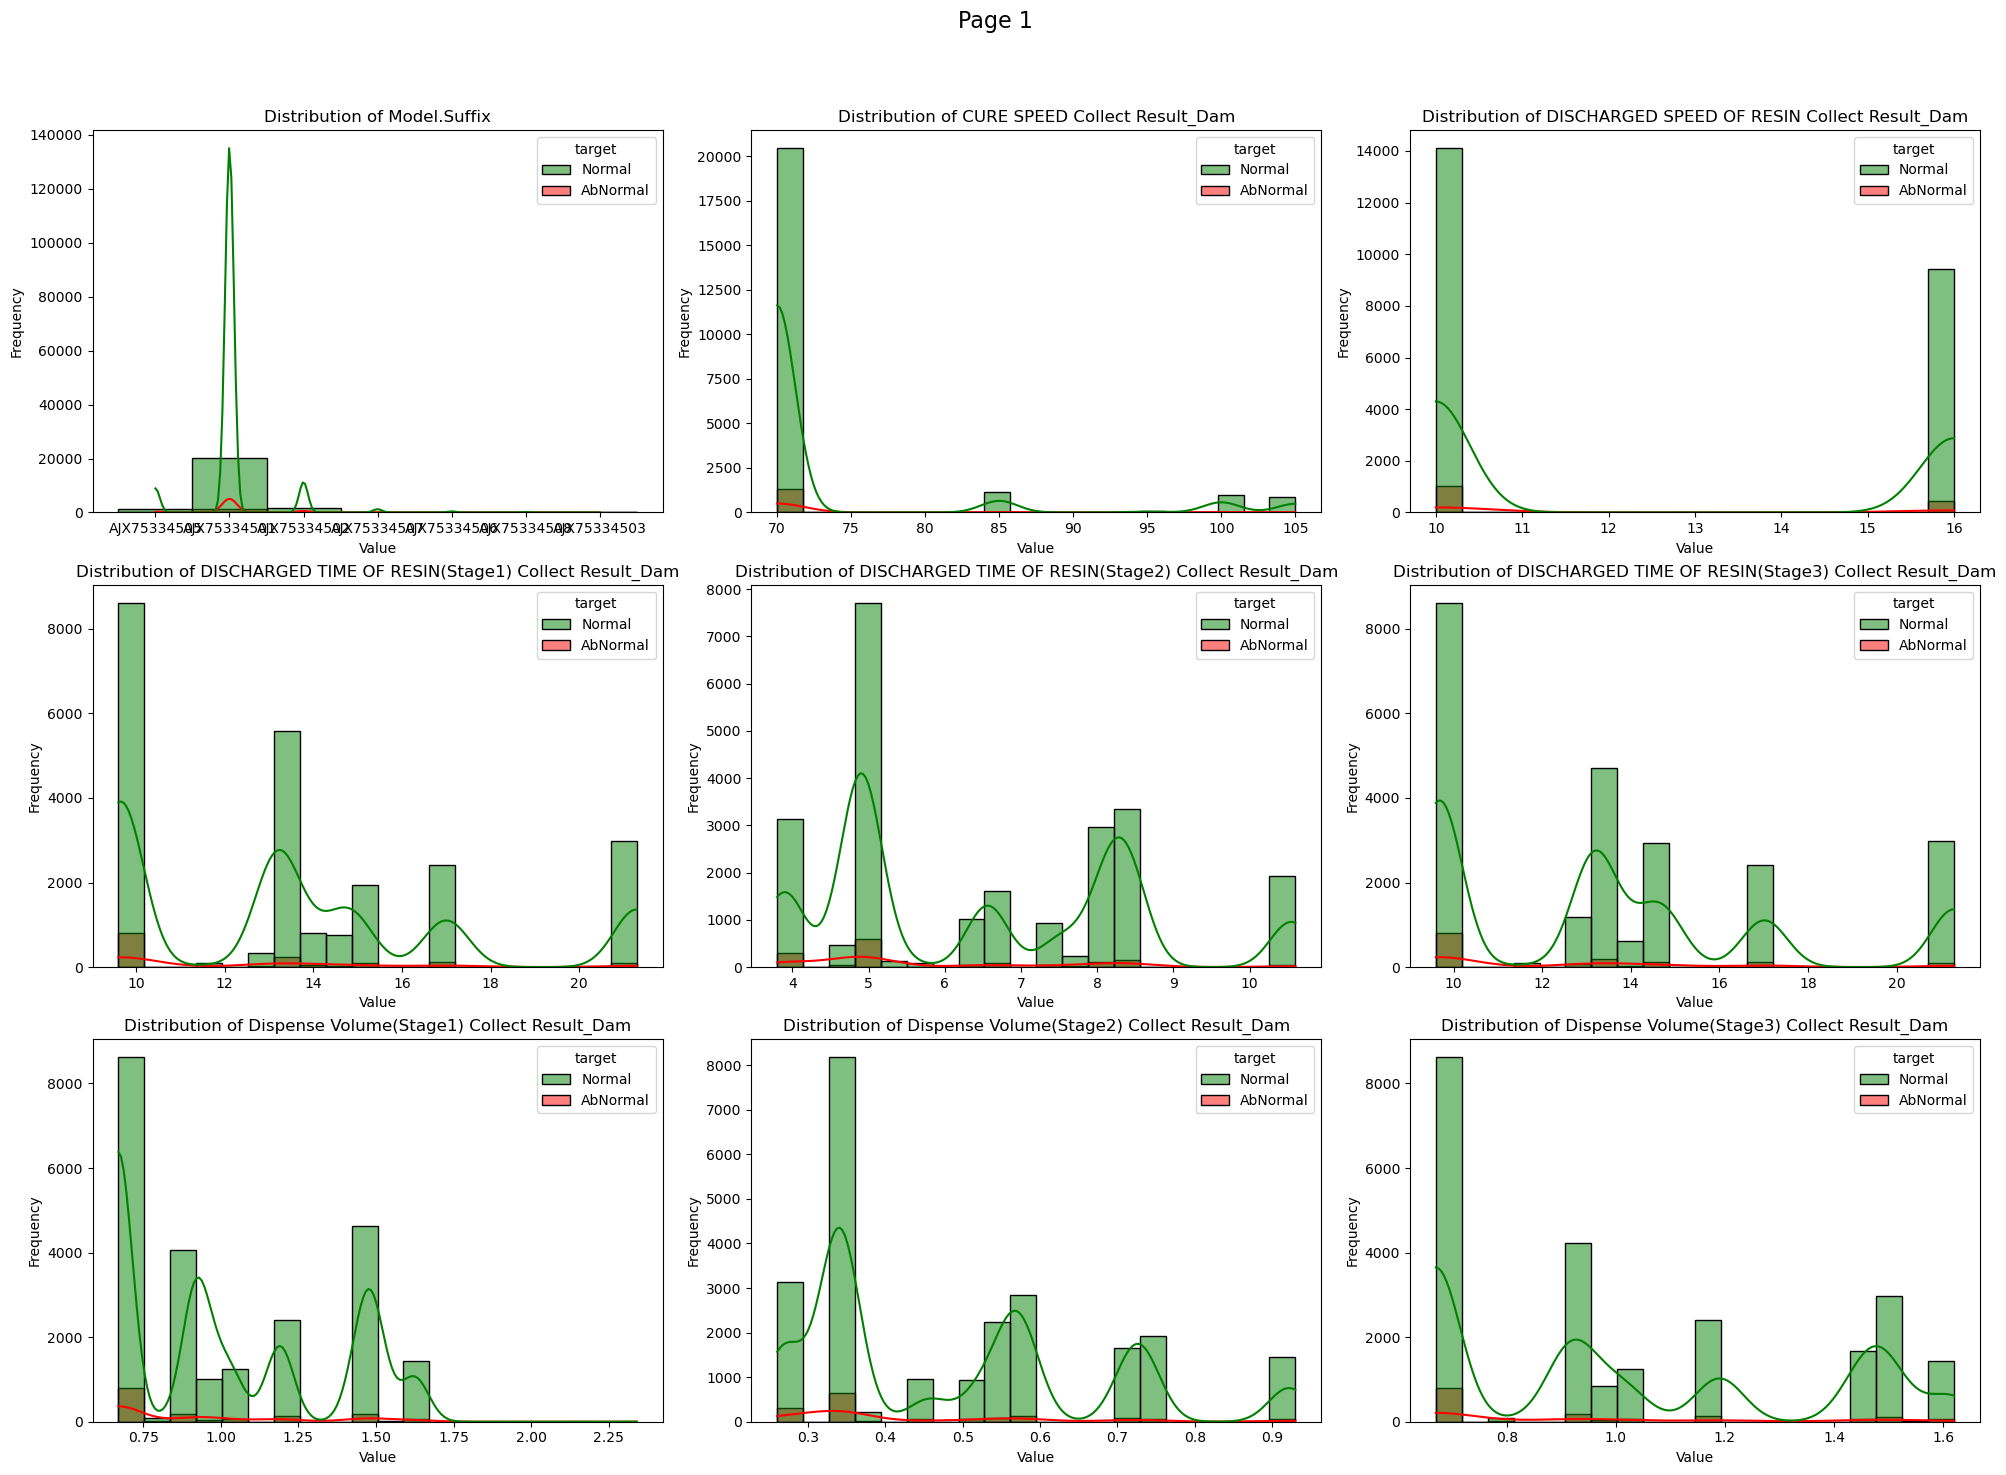

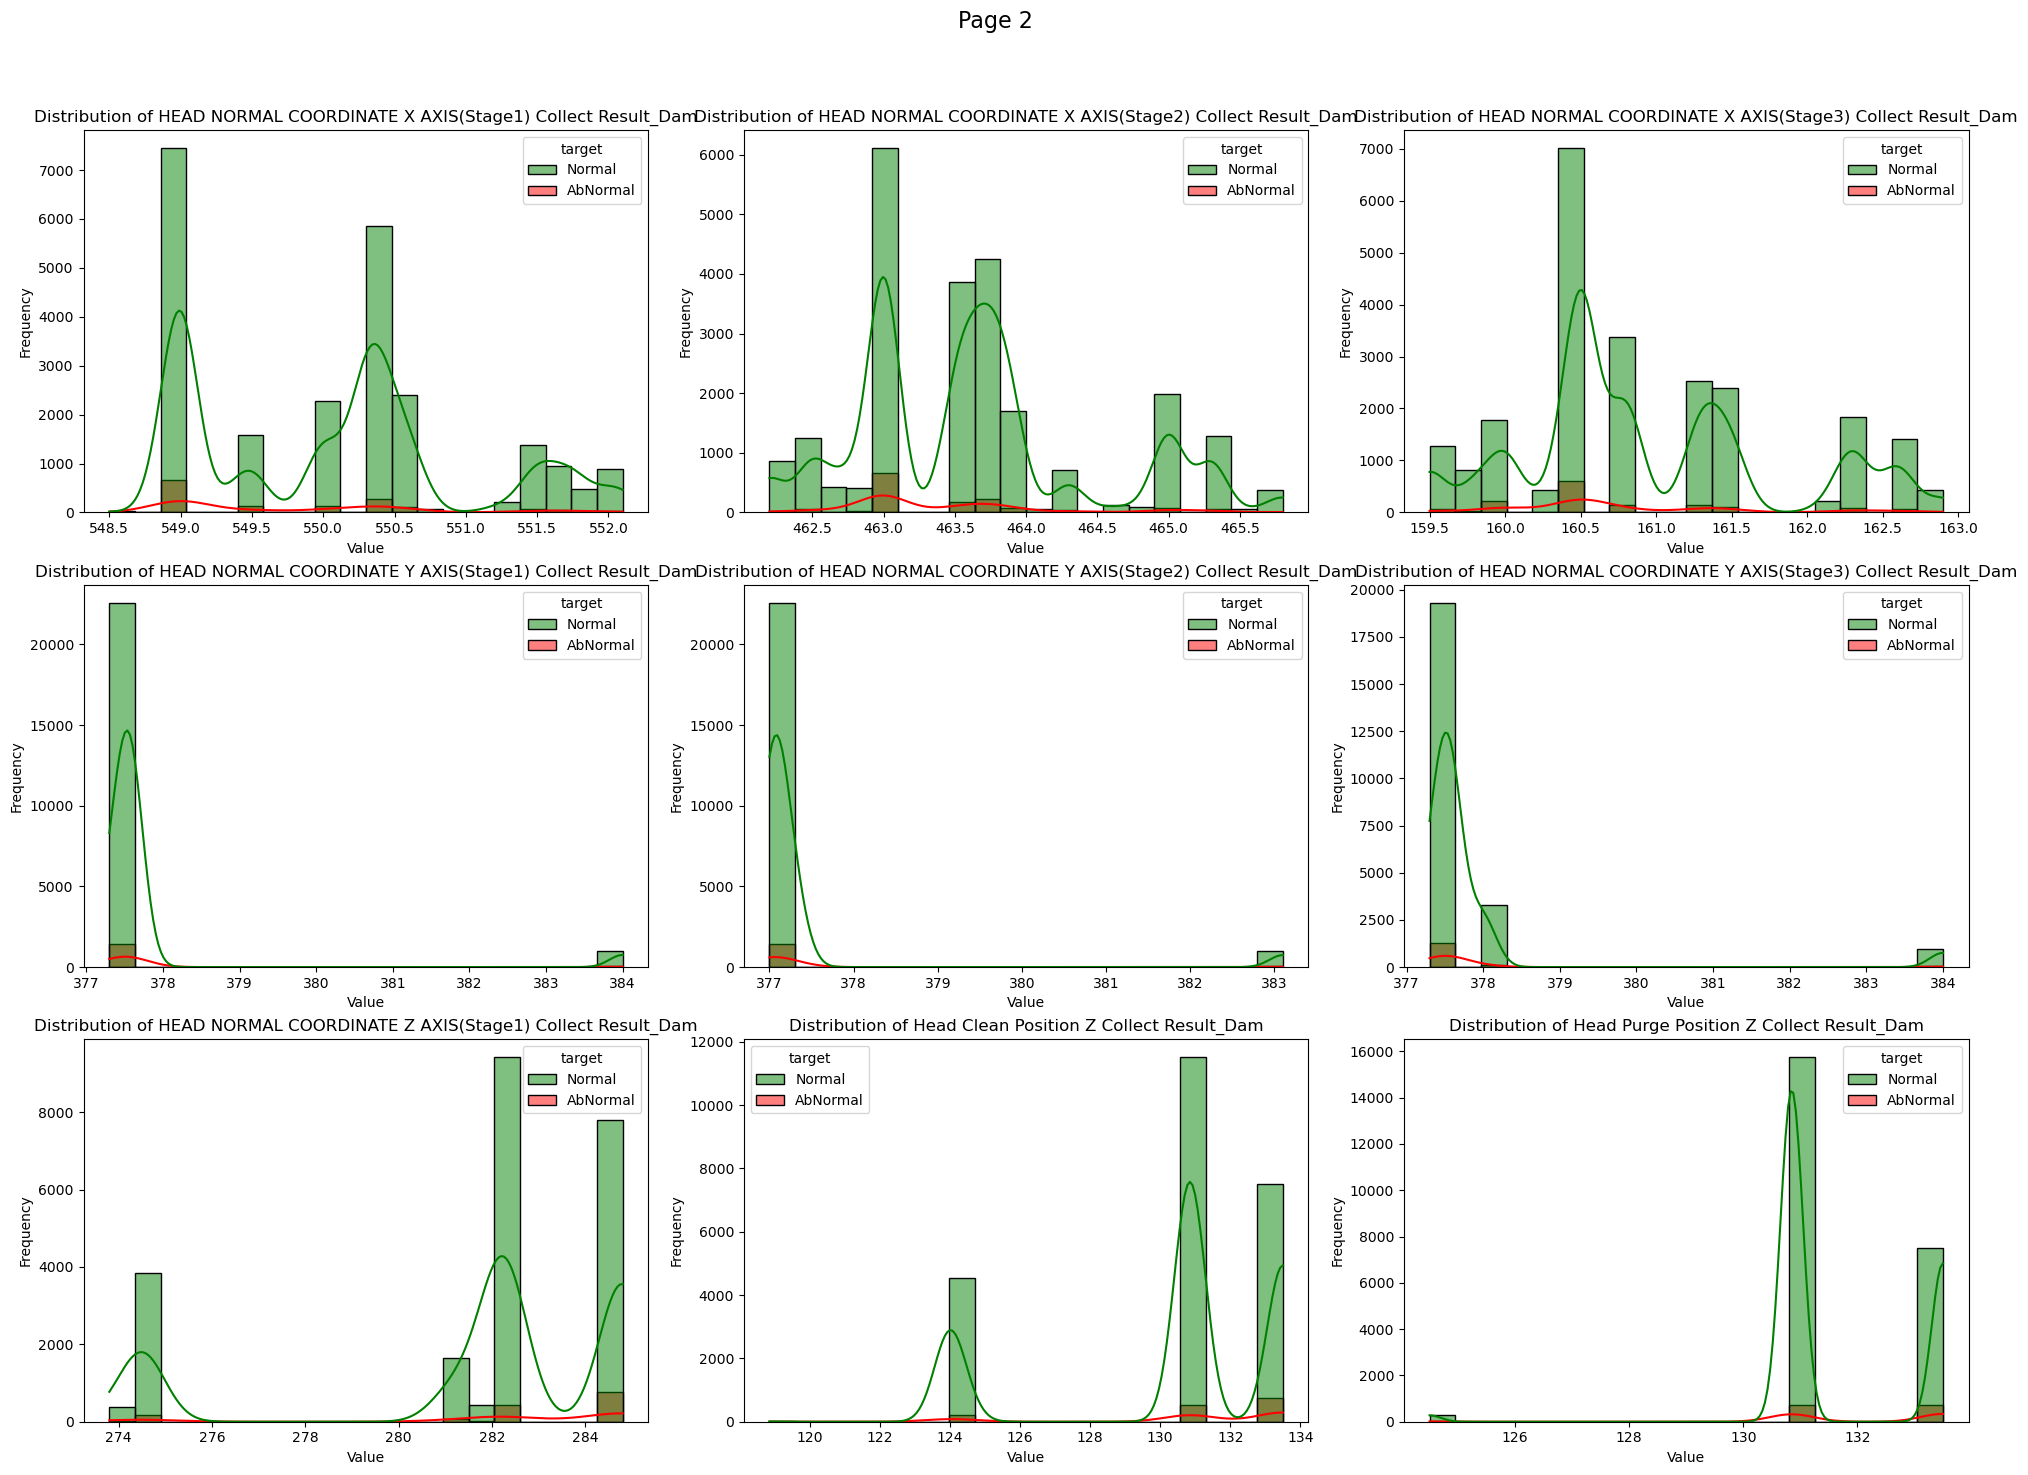

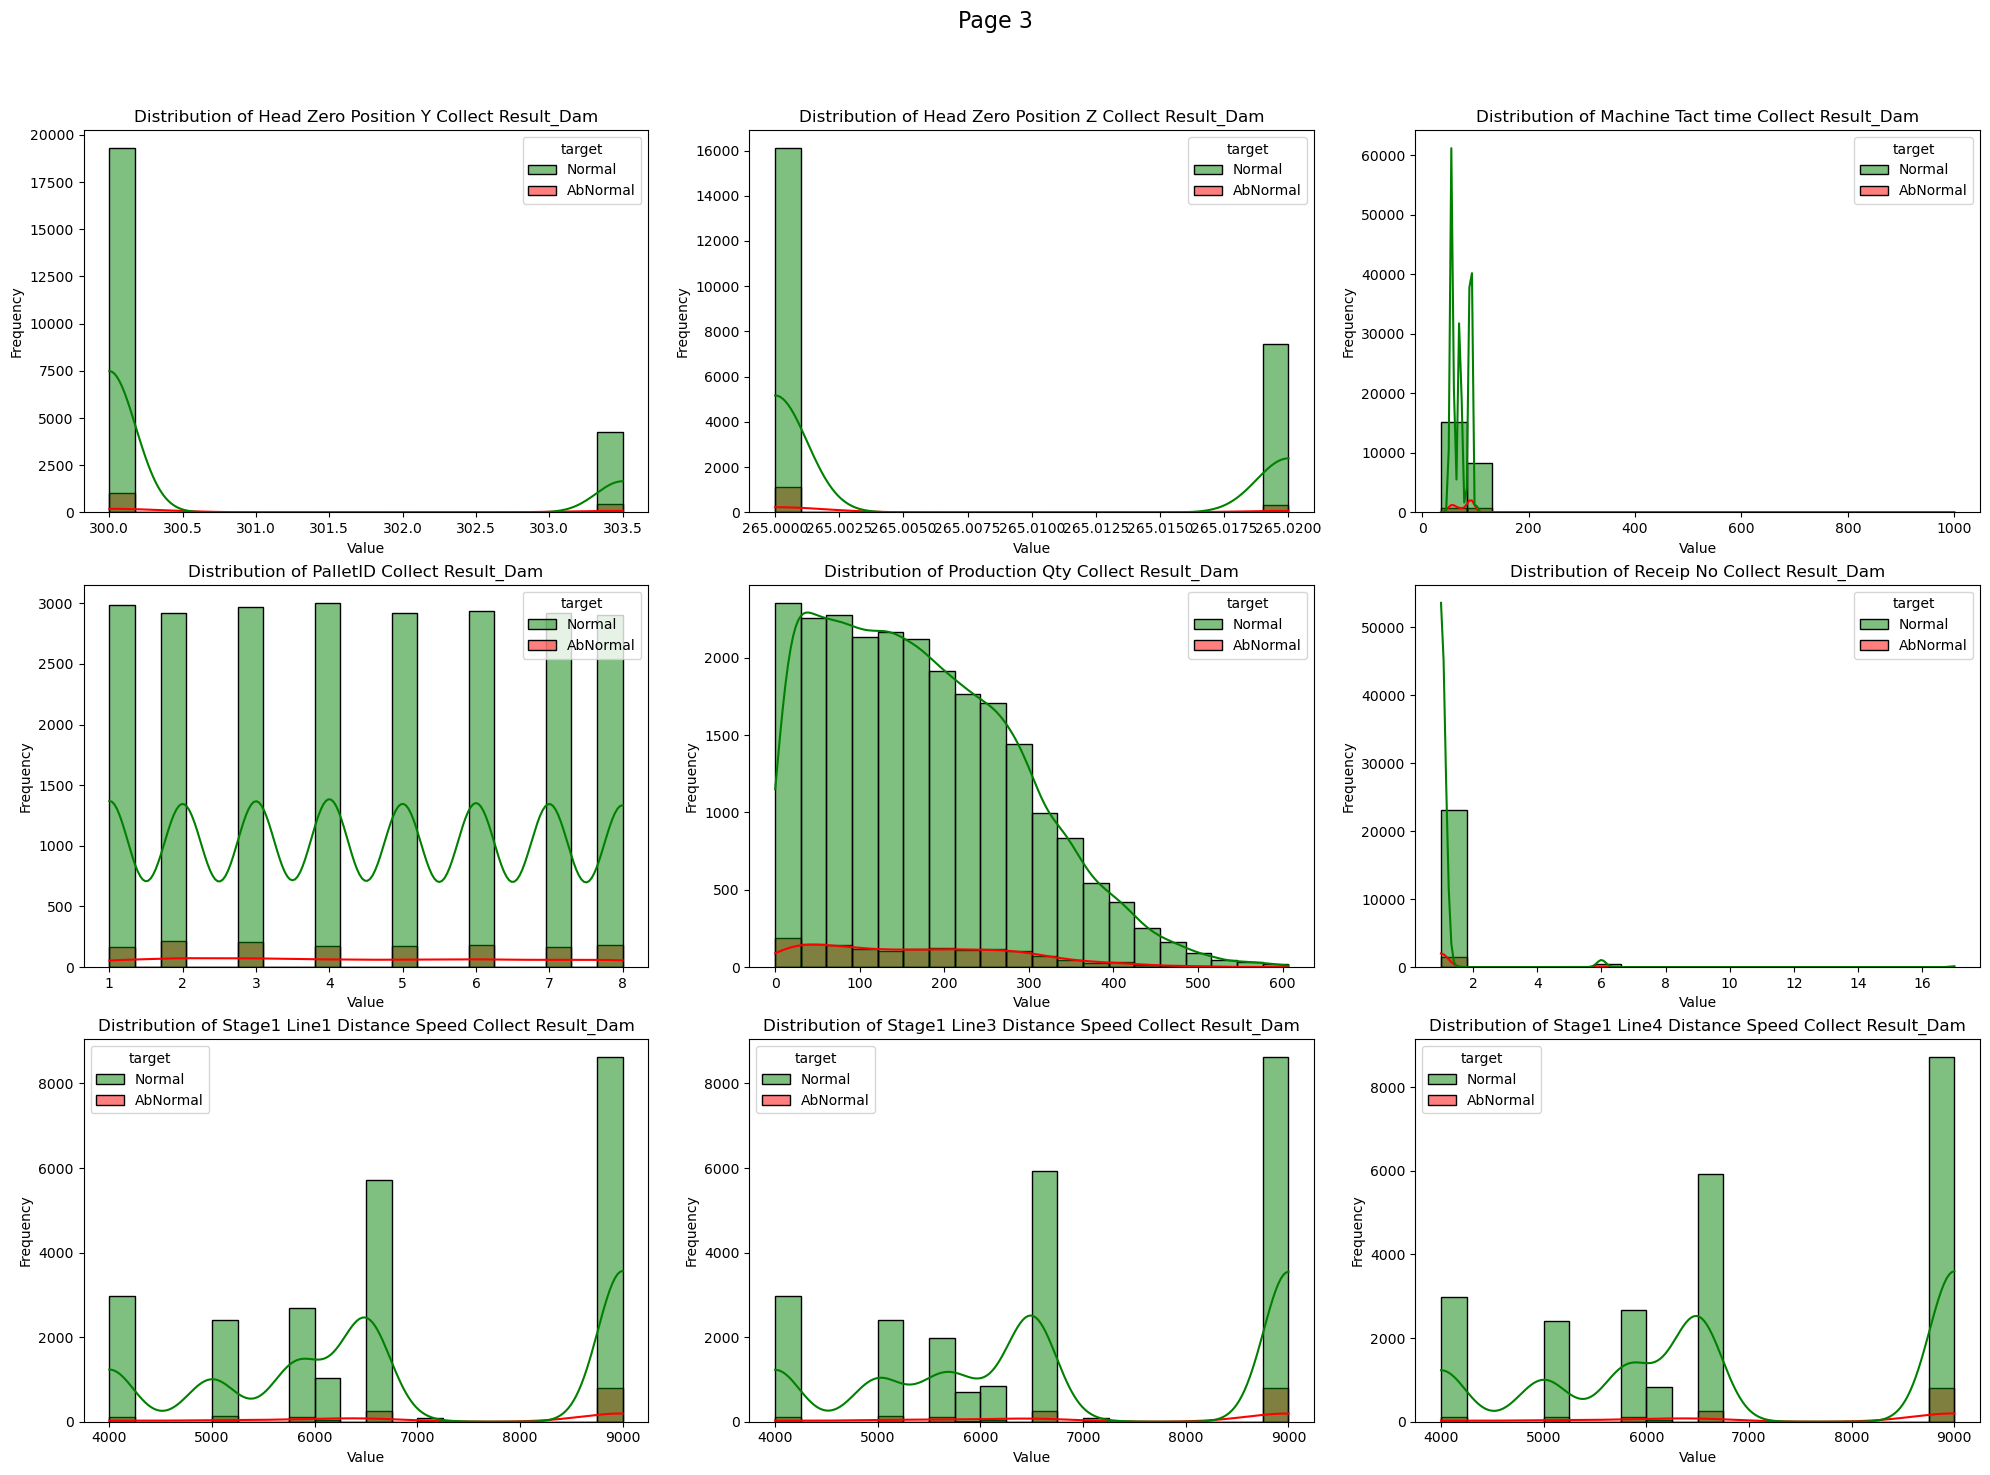

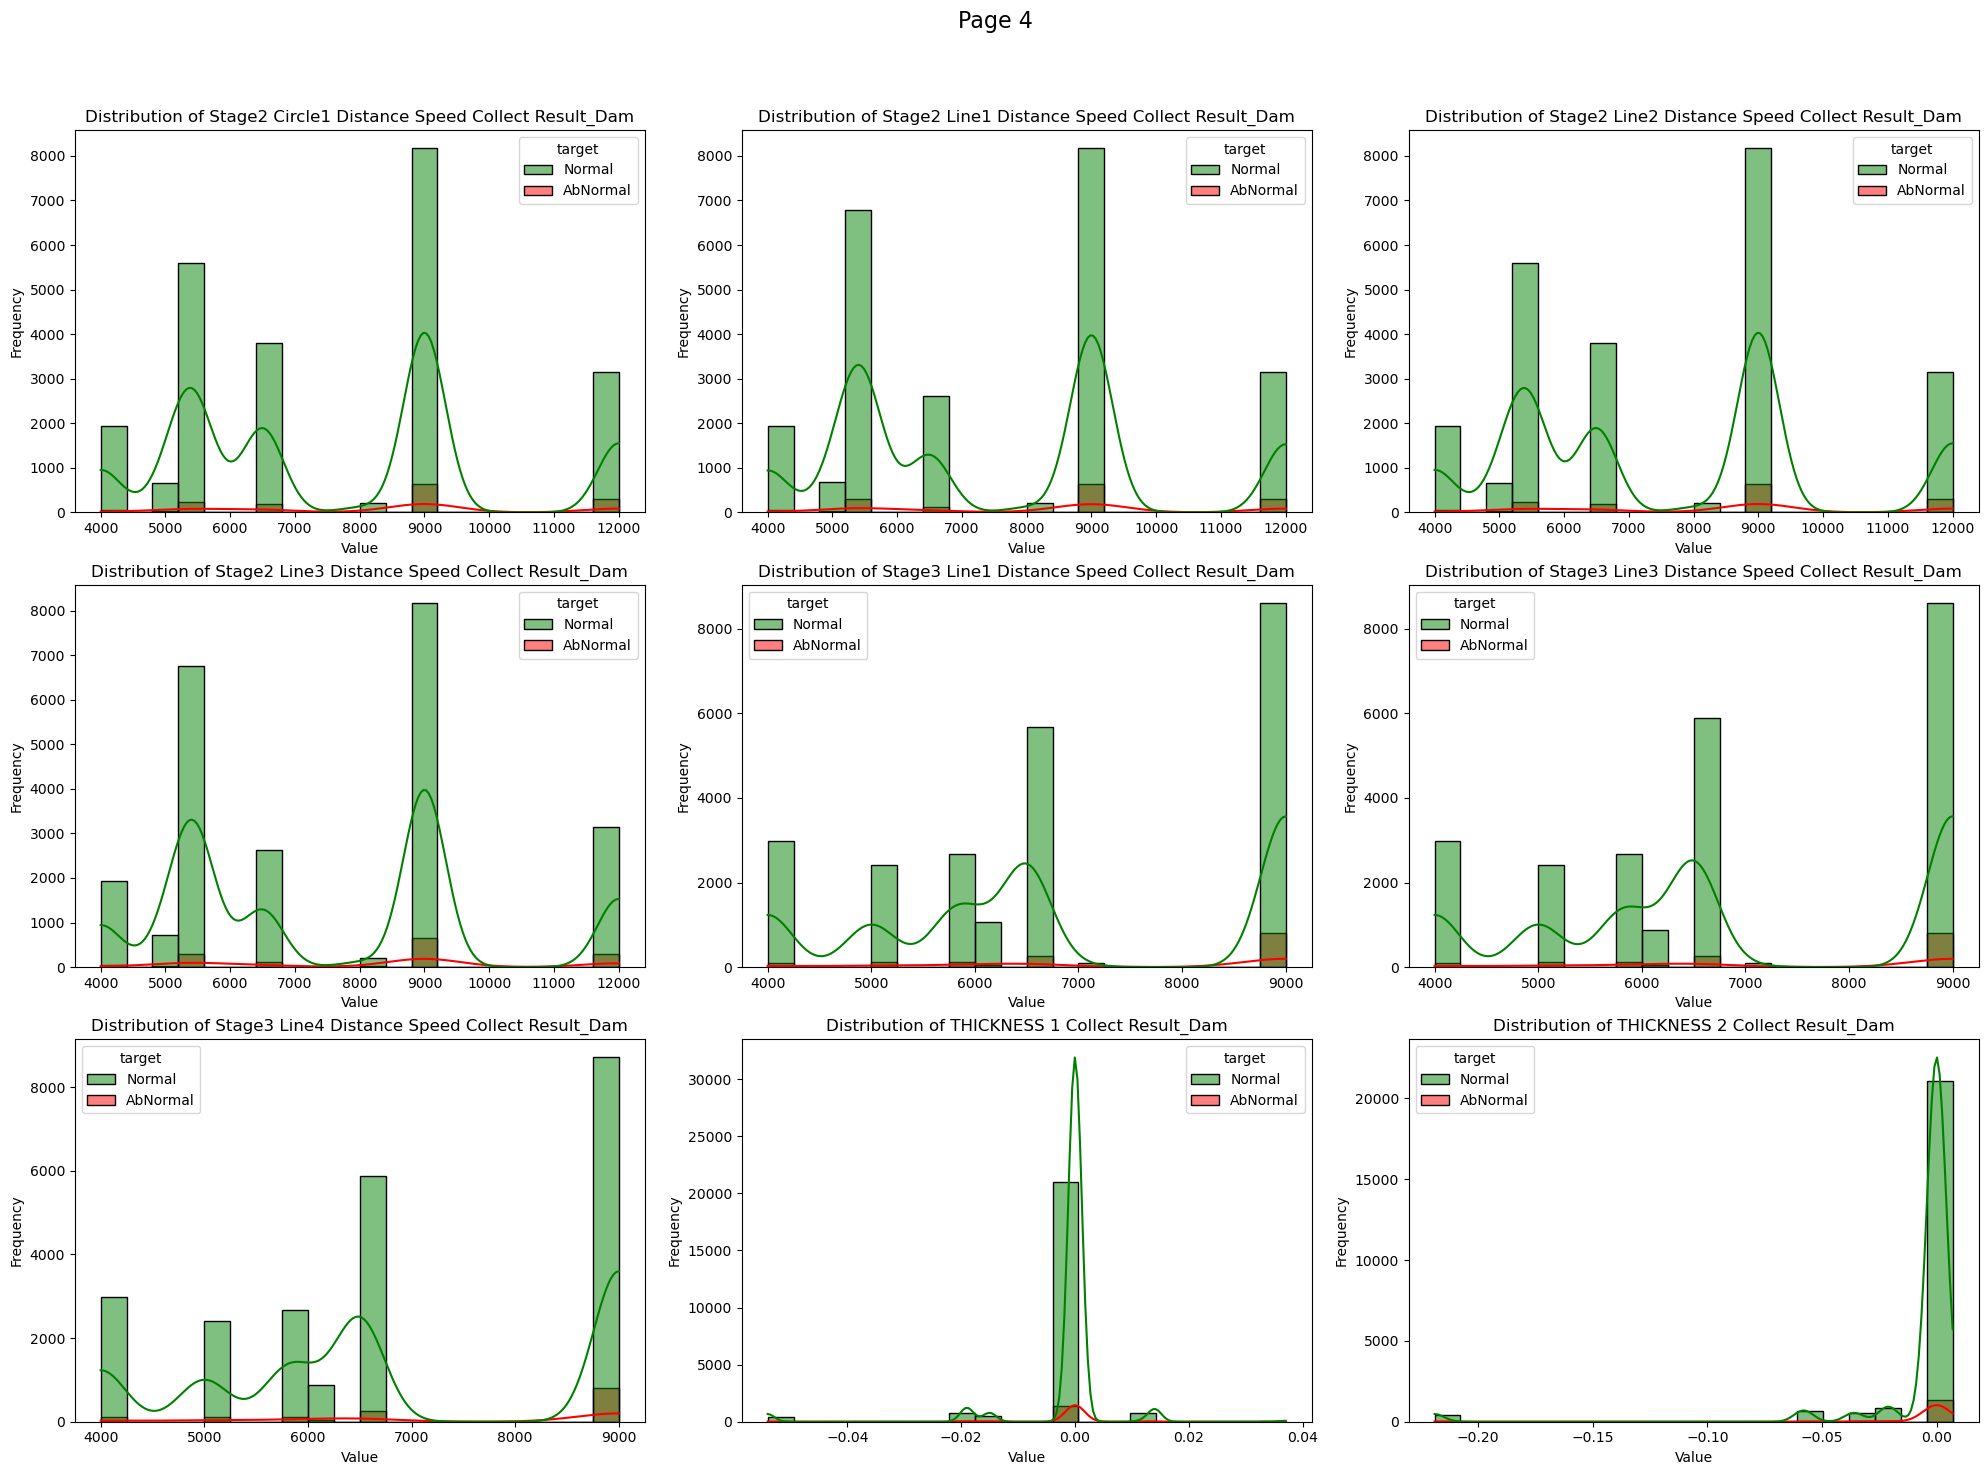

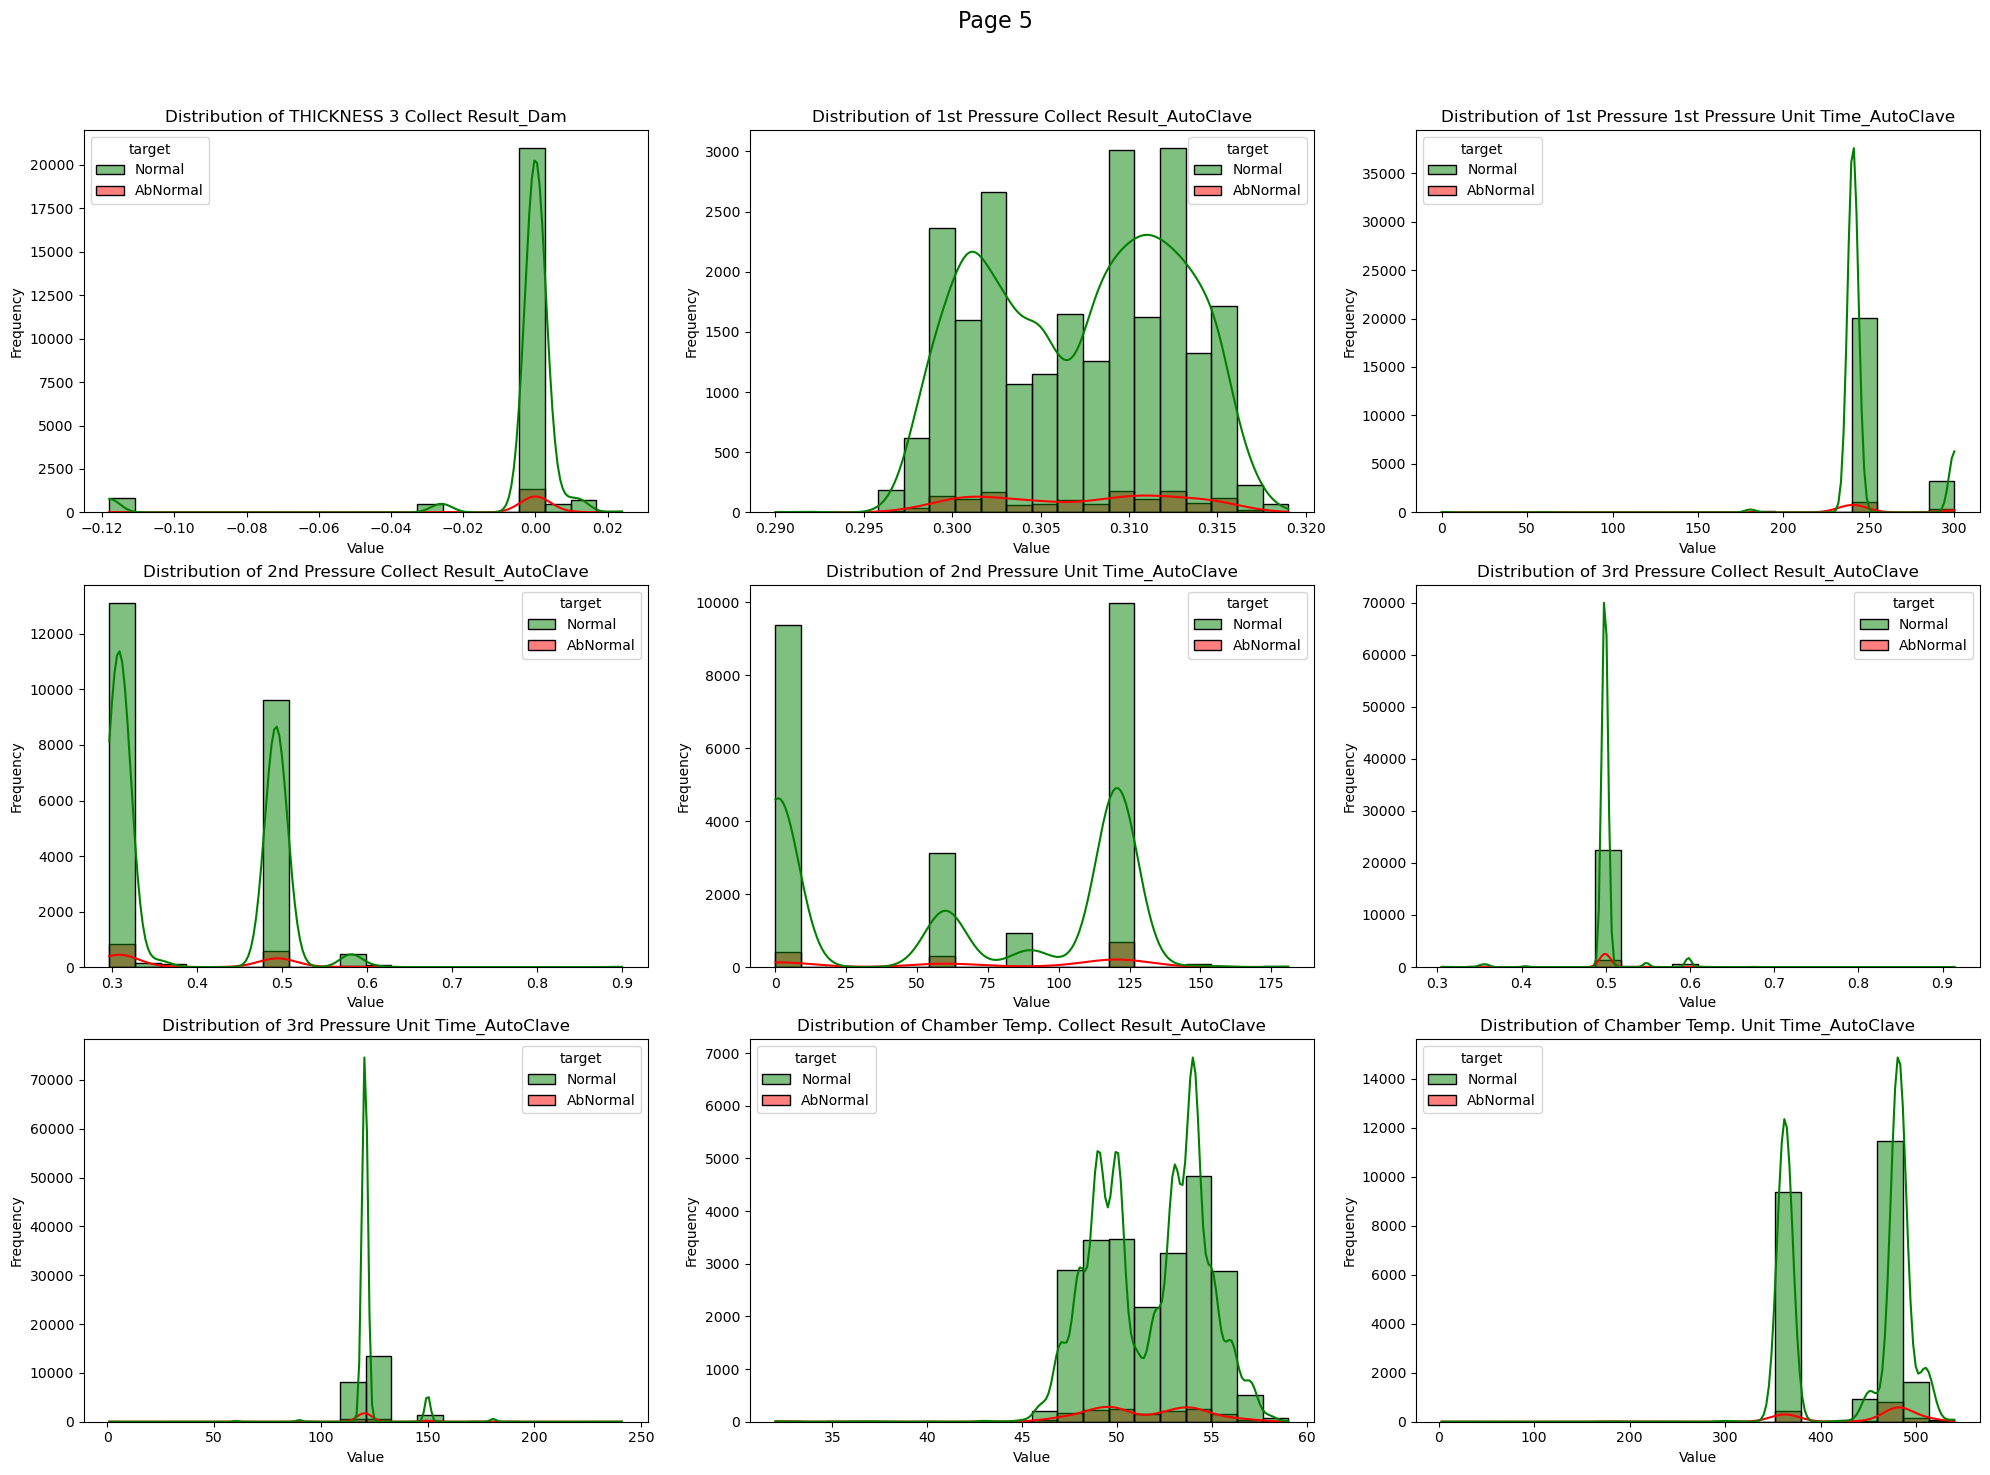

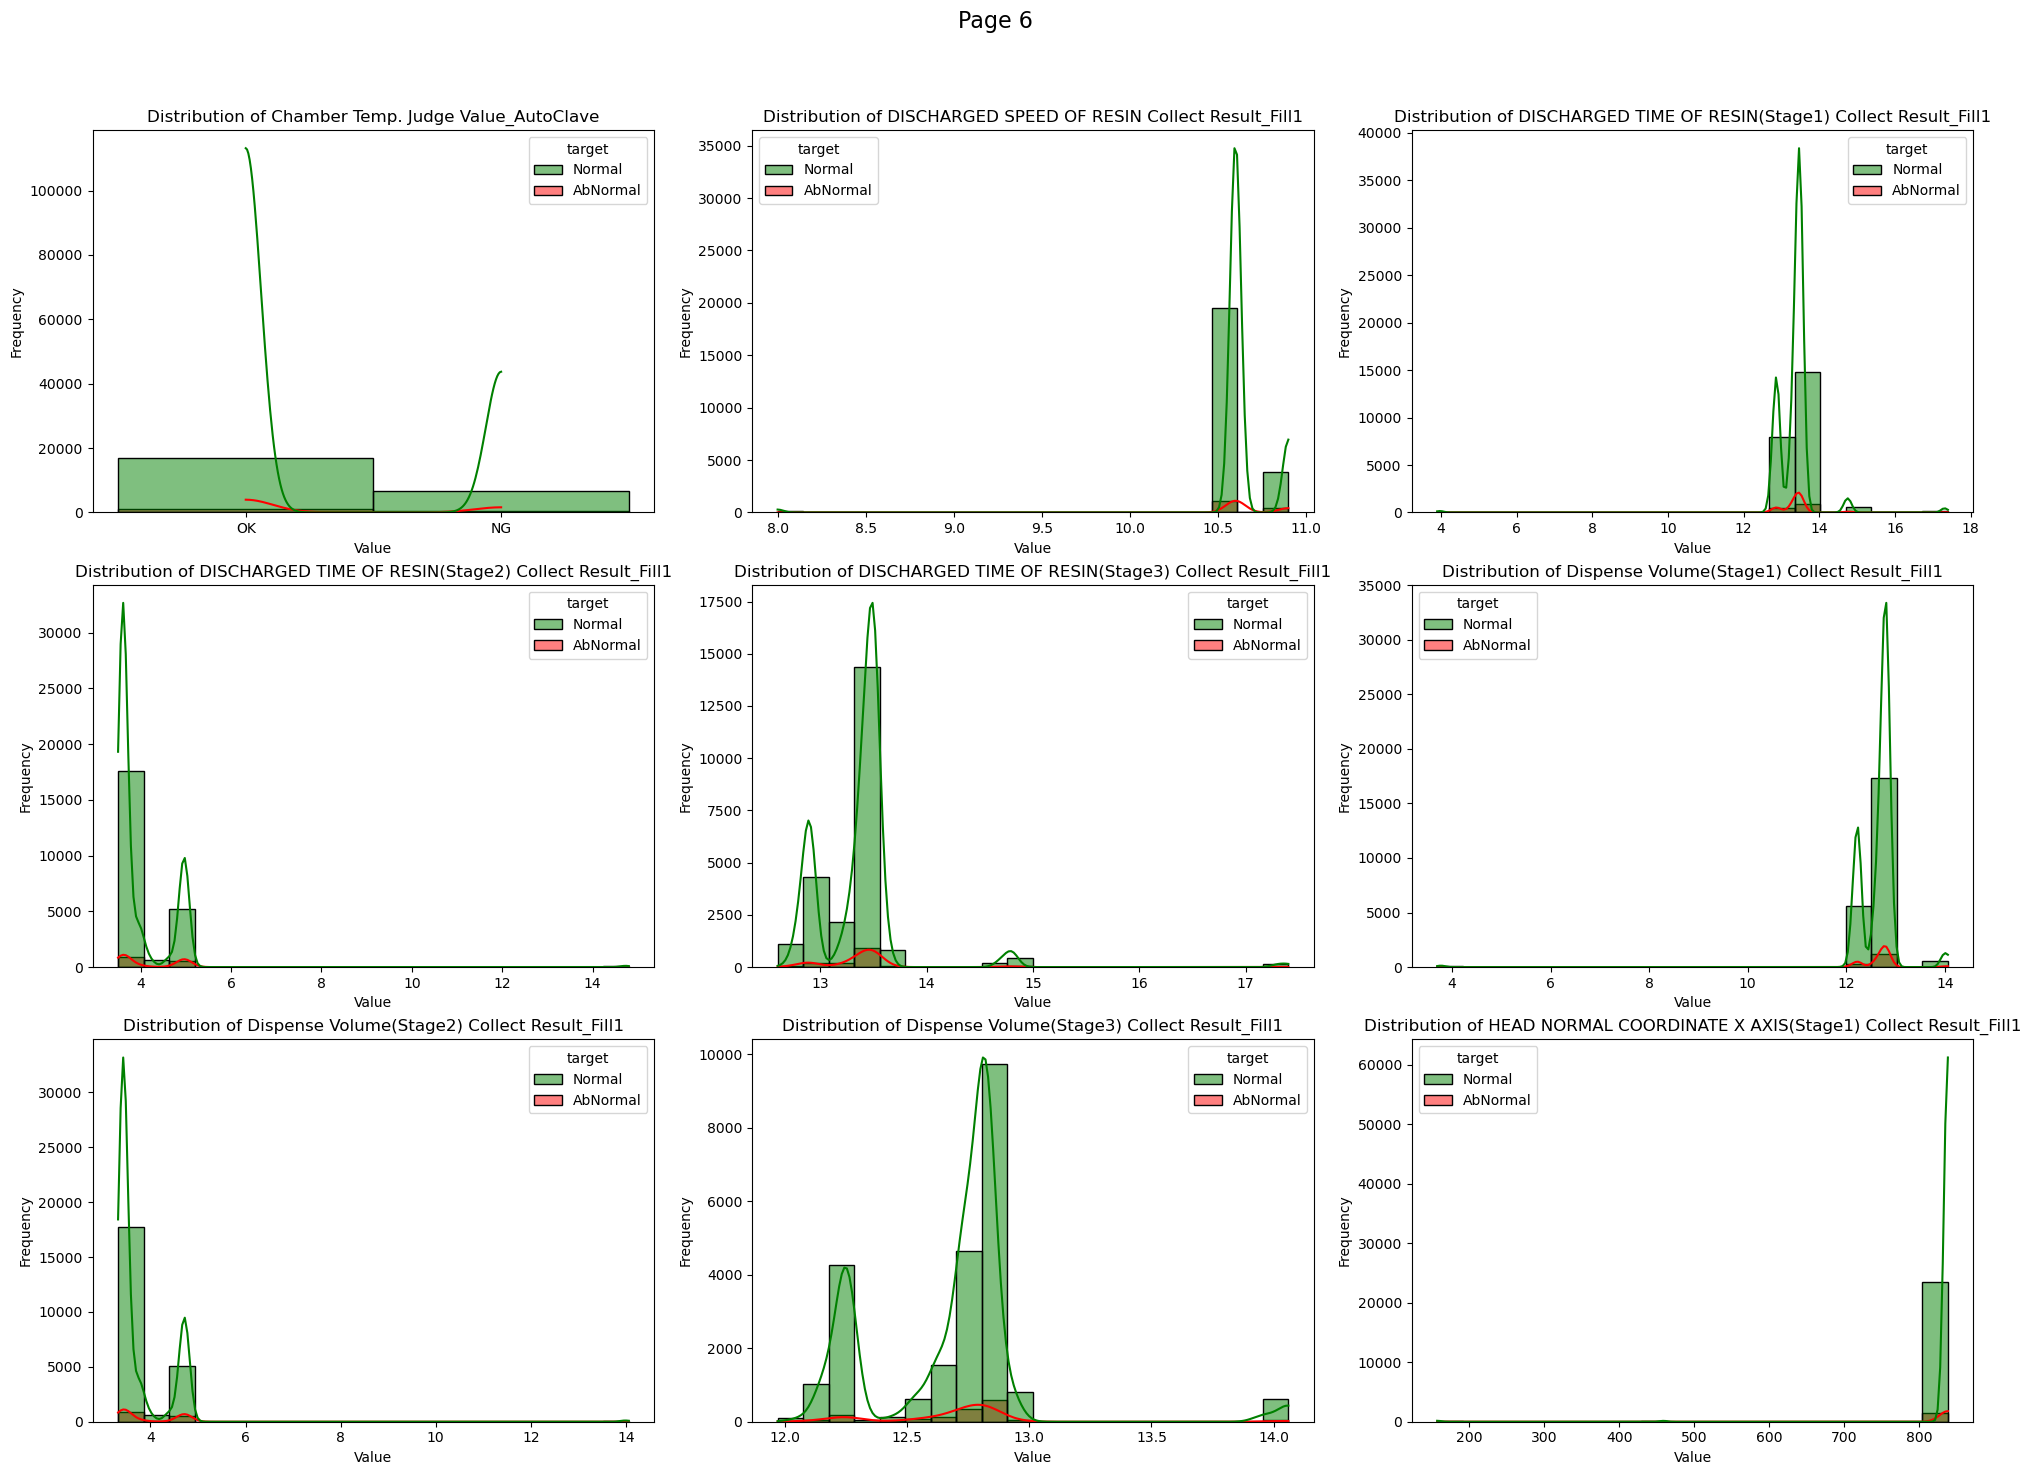

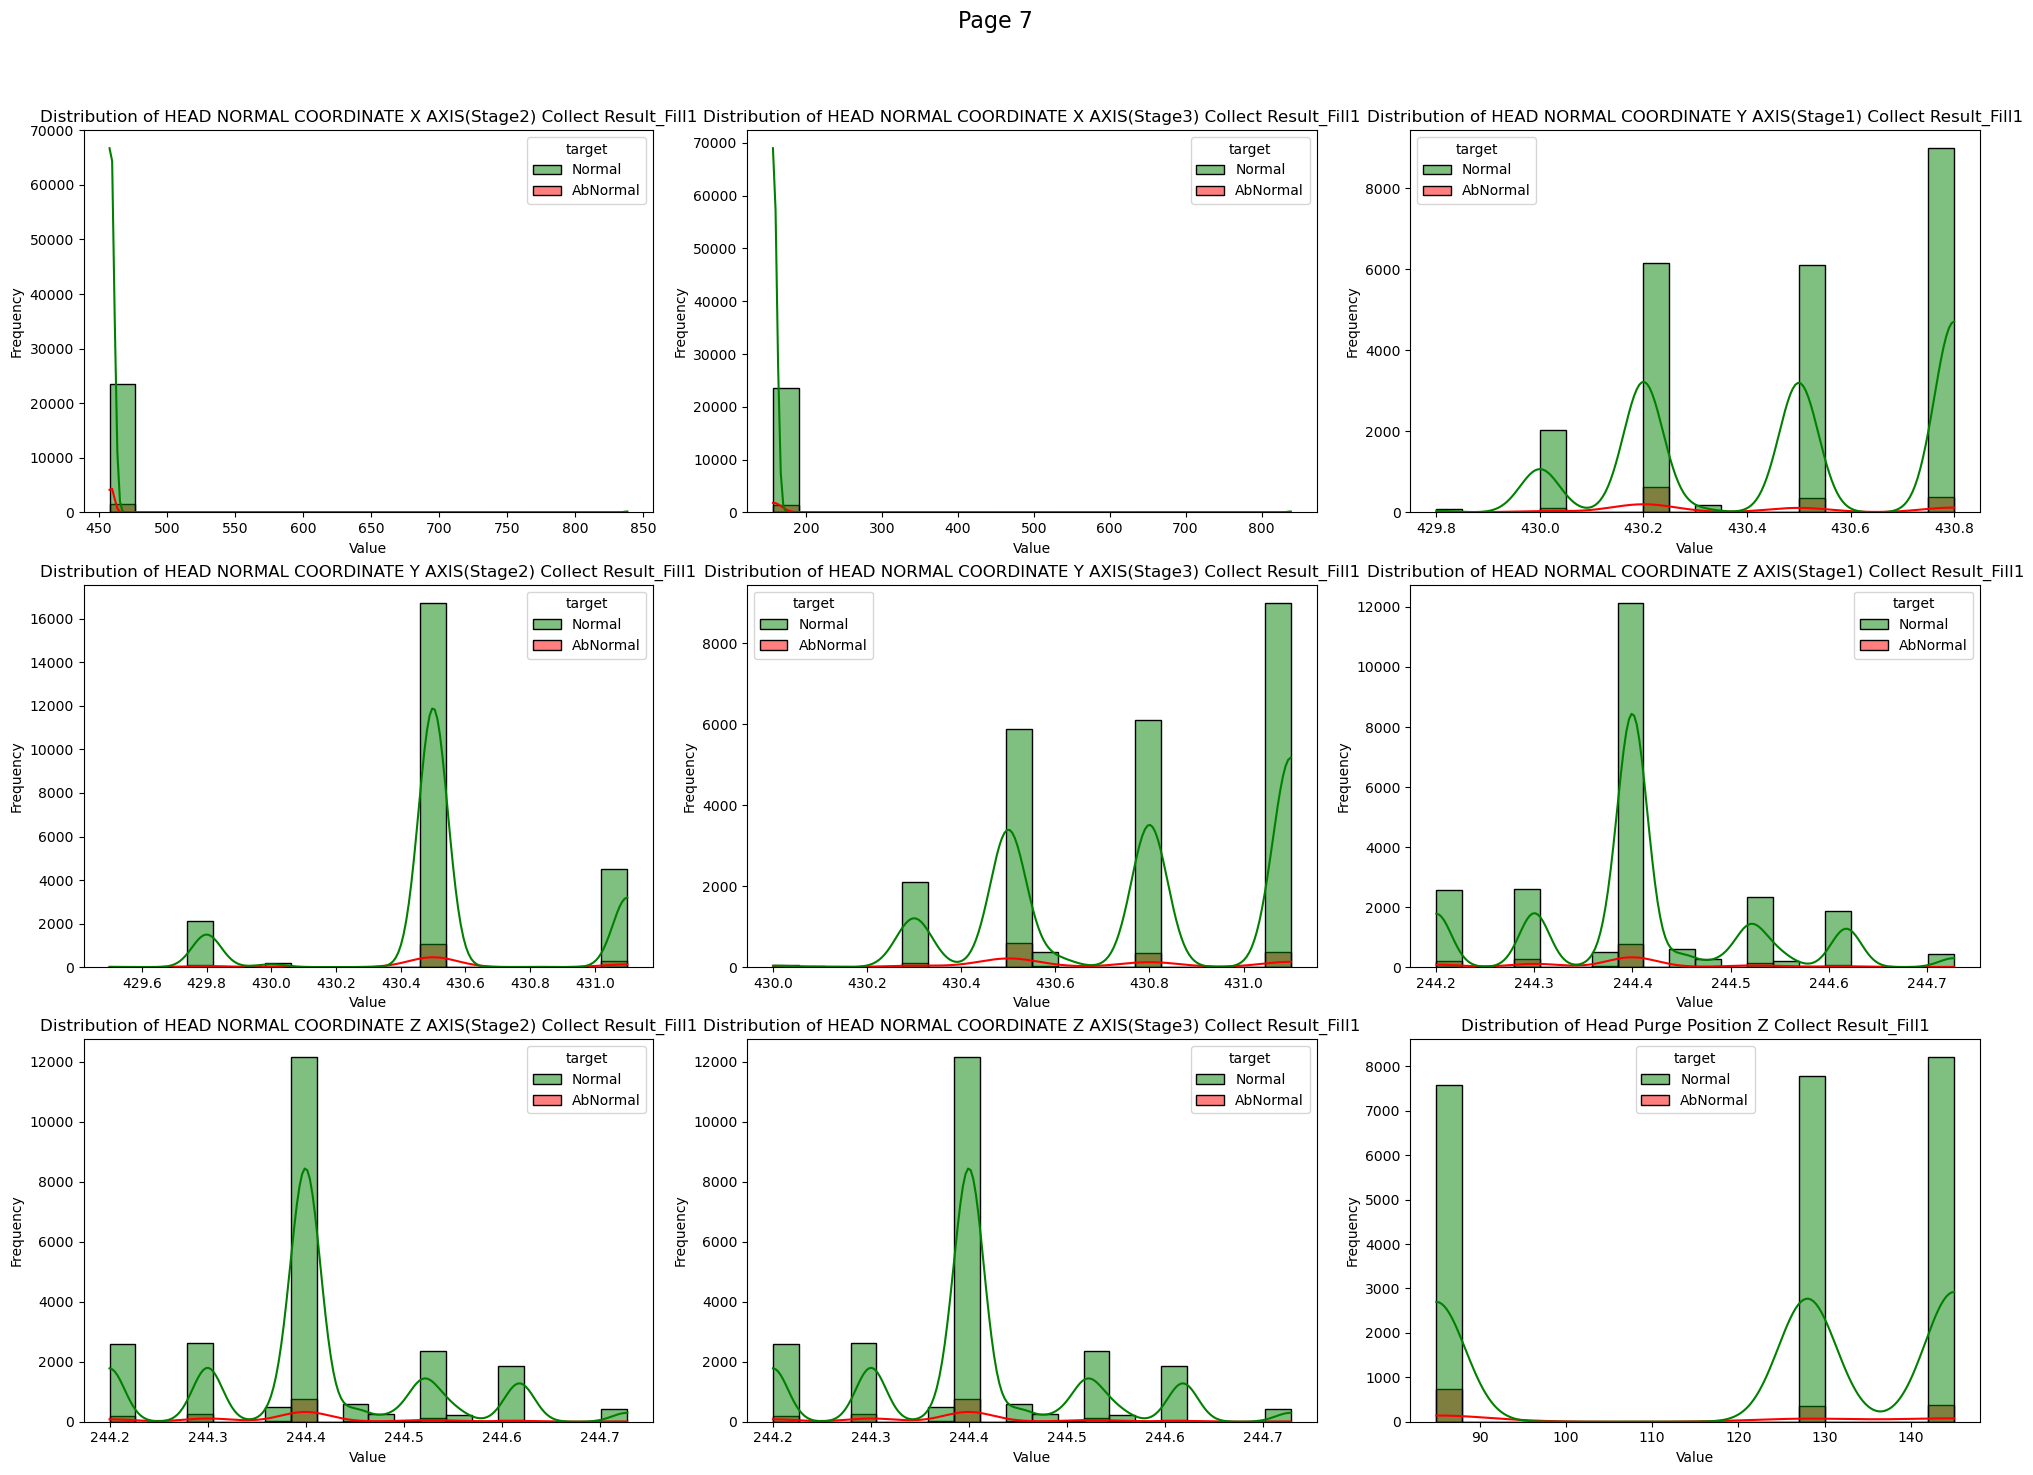

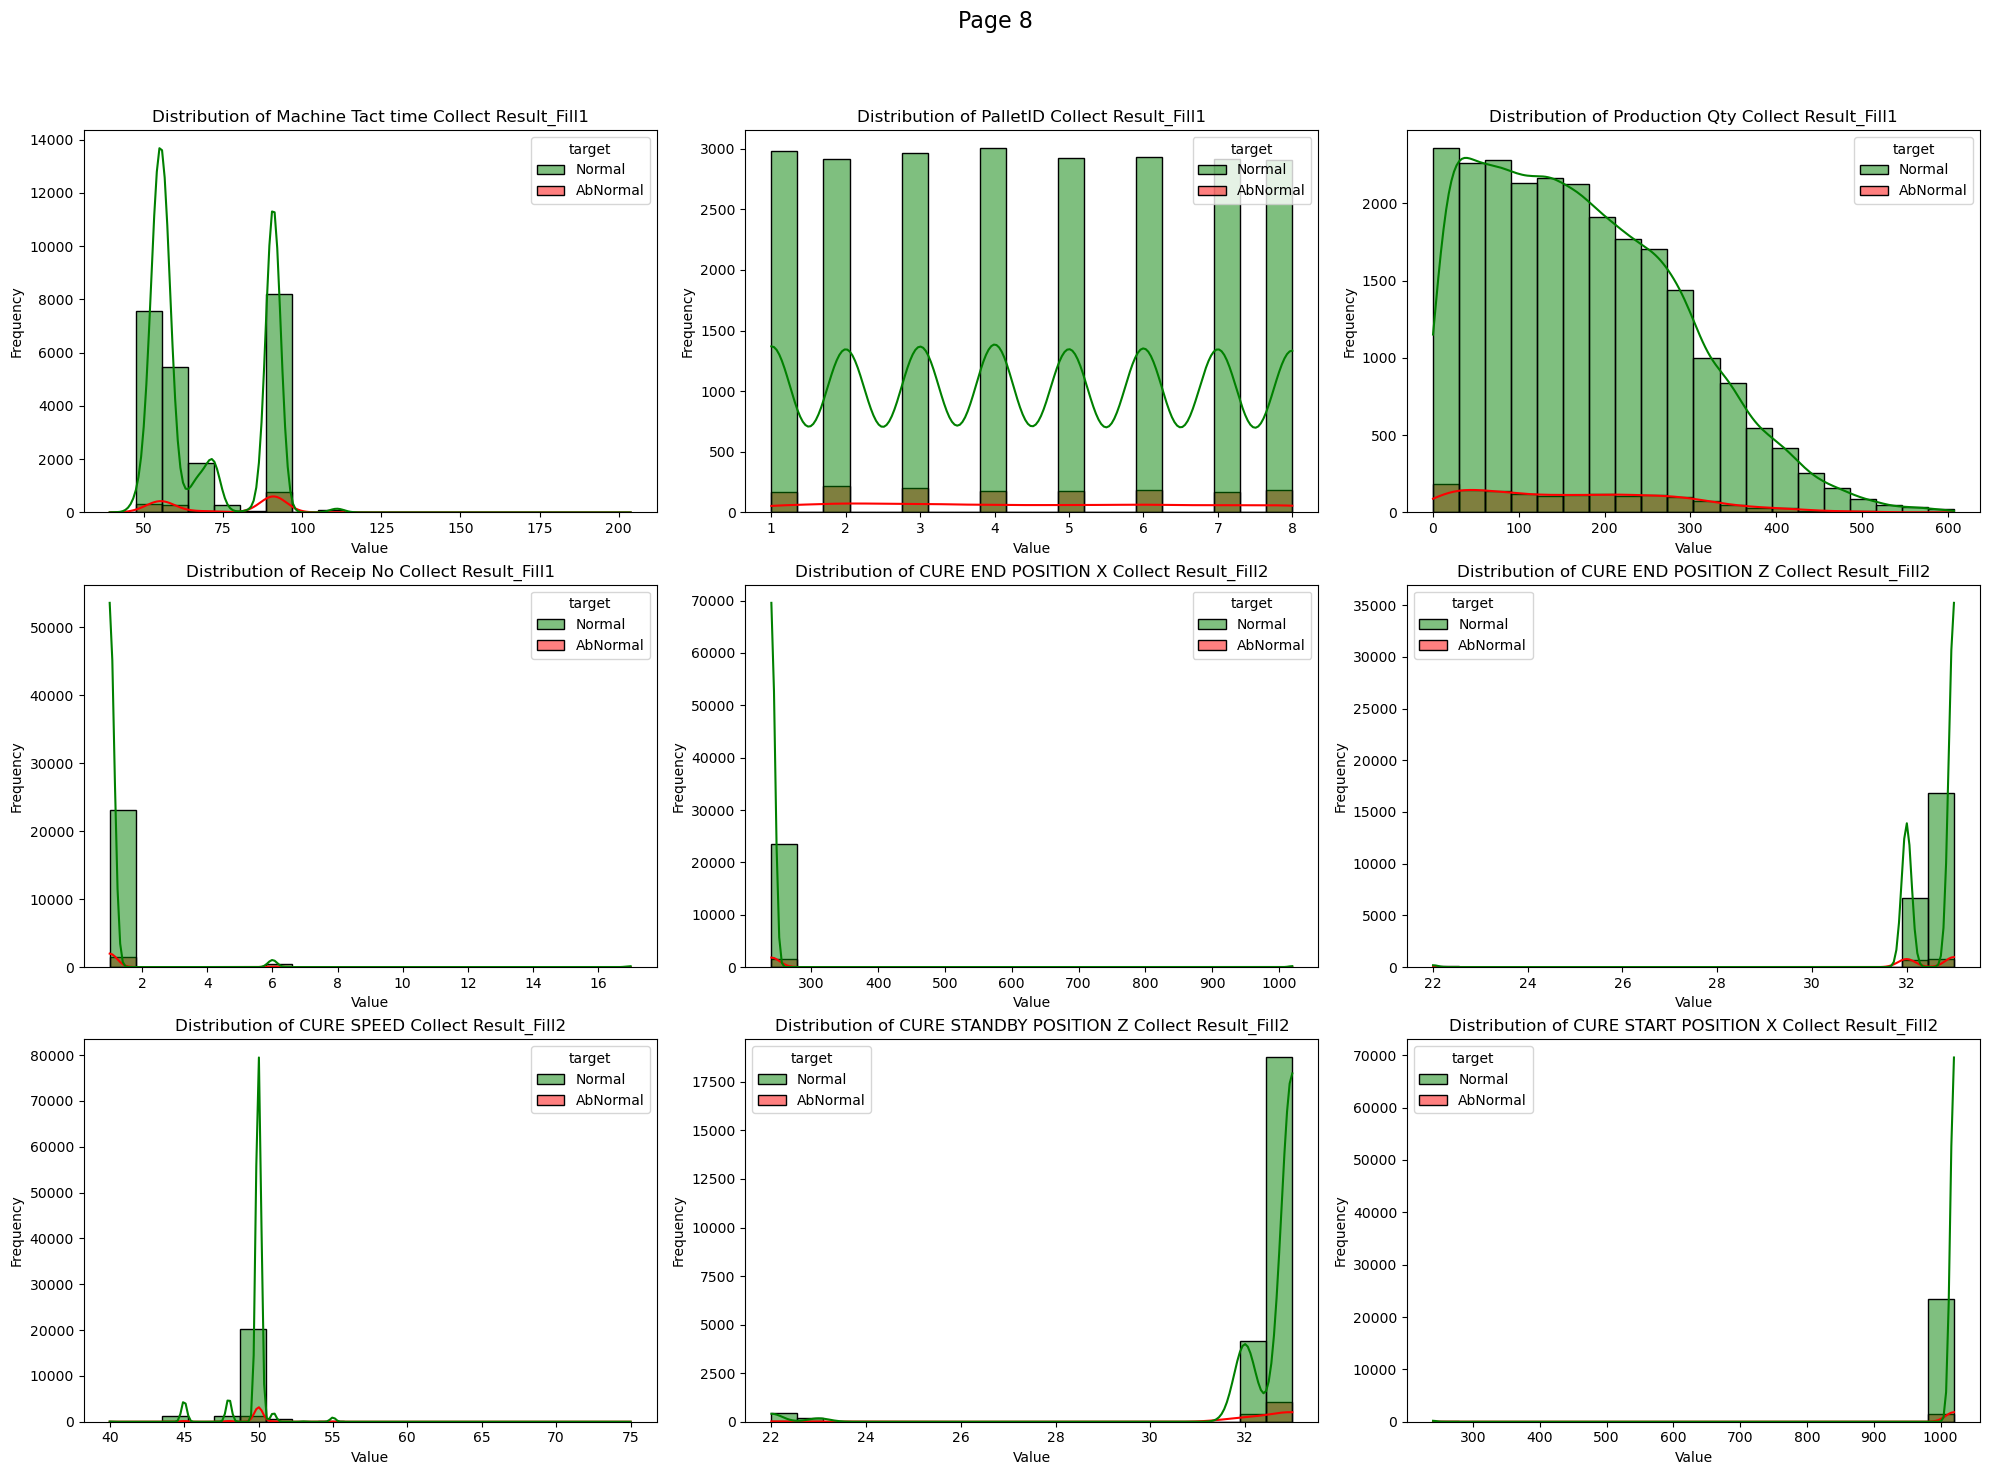

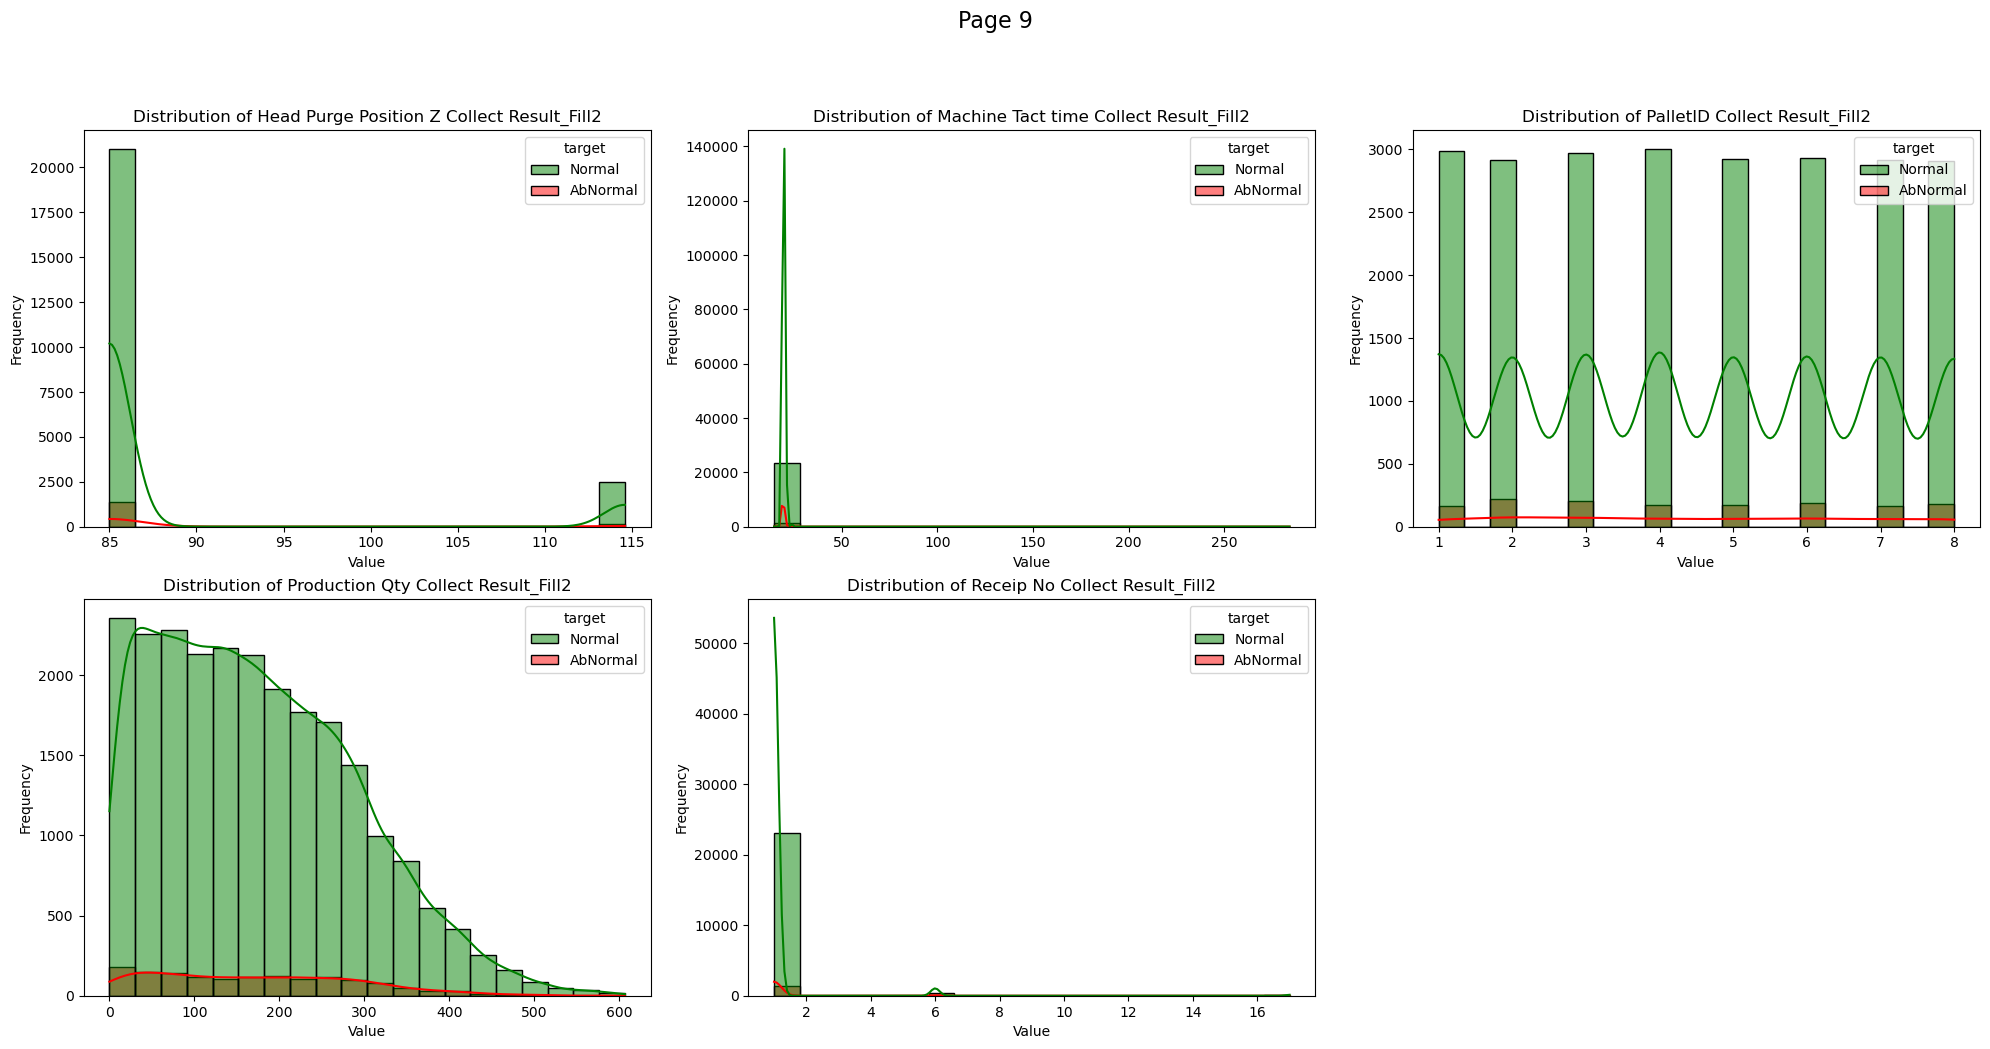

In [16]:
palette = {
    'Normal': 'green',
    'AbNormal': 'red'
}

# 한 페이지에 보여줄 플롯 수 설정
plots_per_page = 9
num_pages = (len(eq1.columns) - 1) // plots_per_page + 1

# 페이지별로 서브플롯 그리기
for page in range(num_pages):
    start_idx = page * plots_per_page
    end_idx = min(start_idx + plots_per_page, len(eq1.columns)-1)
    features = eq1.columns[start_idx:end_idx]

    # 페이지별 서브플롯 그리기
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        sns.histplot(
            data=eq1,
            x=feature,
            hue='target',
            palette=palette,
            ax=ax,
            bins=20,
            element='bars',  # 선택사항: 빈의 외곽선 표시
            kde=True
        )
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

    # 사용되지 않는 서브플롯 숨기기
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

    # 서브플롯 간의 간격 조정
    plt.tight_layout()
    plt.suptitle(f'Page {page+1}', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

In [17]:
for i in eq1.columns:
    print(i, ": " , eq1[i].unique(), '\n')


Model.Suffix :  ['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503'] 

CURE SPEED Collect Result_Dam :  [100  70  85  95 105] 

DISCHARGED SPEED OF RESIN Collect Result_Dam :  [16 10] 

DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam :  [14.9 13.2 14.2 13.6 14.7 21.3 13.1 13.8 21.2 14.8 14.3 13.7 13.5  9.7
  9.6 17.  11.6 17.1] 

DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam :  [ 8.4  6.5  8.1  6.6  8.2 10.5  7.5 10.6  5.5  8.5  7.6  7.9  5.4  8.
  3.9  4.   4.9  4.8  5.   3.8  8.3] 

DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam :  [14.7 13.2 14.3 13.1 13.6 21.3 14.2 14.8 13.8 13.5 21.2 13.7  9.6  9.7
 17.  17.1 11.6  9.8 11.5] 

Dispense Volume(Stage1) Collect Result_Dam :  [1.04 0.92 0.99 1.45 0.95 1.61 1.63 1.49 1.02 0.91 1.44 0.96 1.56 1.48
 1.03 1.   2.34 0.94 1.62 0.67 1.19 0.81] 

Dispense Volume(Stage2) Collect Result_Dam :  [0.58 0.45 0.56 0.72 0.92 0.57 0.73 0.71 0.52 0.74 0.38 0.93 0.59 0.46
 0.53 0.55 0.37 0.9

In [18]:
eq1[['DISCHARGED SPEED OF RESIN Collect Result_Dam', 'DISCHARGED SPEED OF RESIN Collect Result_Fill1', 'target']].value_counts()

DISCHARGED SPEED OF RESIN Collect Result_Dam  DISCHARGED SPEED OF RESIN Collect Result_Fill1  target  
10                                            10.6                                            Normal      10266
16                                            10.6                                            Normal       9287
10                                            10.9                                            Normal       3840
                                              10.6                                            AbNormal      649
16                                            10.6                                            AbNormal      417
10                                            10.9                                            AbNormal      392
16                                            8.0                                             Normal        152
                                                                                              AbNormal        8
d

In [19]:
eq1[['CURE END POSITION X Collect Result_Fill2', 'CURE END POSITION Z Collect Result_Fill2', 'target']].value_counts()

CURE END POSITION X Collect Result_Fill2  CURE END POSITION Z Collect Result_Fill2  target  
240                                       33                                        Normal      16754
                                          32                                        Normal       6646
                                          33                                        AbNormal      803
                                          32                                        AbNormal      651
                                          22                                        Normal         85
1020                                      33                                        Normal         60
                                                                                    AbNormal        7
240                                       22                                        AbNormal        5
dtype: int64

In [20]:
eq1.groupby('DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1')['target'].value_counts()

DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1  target  
12.6                                                   Normal         7
                                                       AbNormal       1
12.7                                                   Normal        85
                                                       AbNormal      14
12.8                                                   Normal      1036
                                                       AbNormal      42
12.9                                                   Normal      4275
                                                       AbNormal     193
13.0                                                   Normal        37
                                                       AbNormal       2
13.1                                                   Normal        46
                                                       AbNormal       7
13.2                                                   Normal       546


In [21]:
eq2[['DISCHARGED SPEED OF RESIN Collect Result_Dam', 'Head Zero Position Y Collect Result_Dam', 'target']].value_counts()

DISCHARGED SPEED OF RESIN Collect Result_Dam  Head Zero Position Y Collect Result_Dam  target  
16                                            300.0                                    Normal      9074
10                                            300.0                                    Normal      5513
16                                            300.0                                    AbNormal     493
10                                            300.0                                    AbNormal     313
                                              303.5                                    AbNormal      43
                                                                                       Normal        21
15                                            300.0                                    Normal         3
                                                                                       AbNormal       1
dtype: int64

In [28]:
df_5600 = df[df['Stage1 Line3 Distance Speed Collect Result_Dam'] == 5600]
for i in df_5600.columns:
    print(i, ":\n", df_5600[i].value_counts(), "\n\n")

Equipment_Dam :
 Dam dispenser #1    2088
Dam dispenser #2    1911
Name: Equipment_Dam, dtype: int64 


Model.Suffix :
 AJX75334505    2063
AJX75334501    1584
AJX75334502     327
AJX75334506      17
AJX75334507       8
Name: Model.Suffix, dtype: int64 


CURE END POSITION X Collect Result_Dam :
 240     2088
1000    1911
Name: CURE END POSITION X Collect Result_Dam, dtype: int64 


CURE END POSITION Z Collect Result_Dam :
 2.5     2088
12.5    1911
Name: CURE END POSITION Z Collect Result_Dam, dtype: int64 


CURE END POSITION ? Collect Result_Dam :
 -90    2088
 90    1911
Name: CURE END POSITION ? Collect Result_Dam, dtype: int64 


CURE SPEED Collect Result_Dam :
 100    1398
105    1390
85     1211
Name: CURE SPEED Collect Result_Dam, dtype: int64 


CURE START POSITION X Collect Result_Dam :
 1030    2088
280     1911
Name: CURE START POSITION X Collect Result_Dam, dtype: int64 


DISCHARGED SPEED OF RESIN Collect Result_Dam :
 16    3999
Name: DISCHARGED SPEED OF RESIN Collect R

In [29]:
df_5600_eq1 = df[ (df['Stage1 Line3 Distance Speed Collect Result_Dam'] == 5600) & (df['Equipment_Dam'] == 'Dam dispenser #1') & (df['Equipment_Fill1'] == 'Fill1 dispenser #1') & (df['Equipment_Fill2'] == 'Fill2 dispenser #1')]
for i in df_5600_eq1.columns:
    print(i, ":\n", df_5600_eq1[i].value_counts(), "\n\n")

Equipment_Dam :
 Dam dispenser #1    2086
Name: Equipment_Dam, dtype: int64 


Model.Suffix :
 AJX75334505    1085
AJX75334501     820
AJX75334502     167
AJX75334507       8
AJX75334506       6
Name: Model.Suffix, dtype: int64 


CURE END POSITION X Collect Result_Dam :
 240    2086
Name: CURE END POSITION X Collect Result_Dam, dtype: int64 


CURE END POSITION Z Collect Result_Dam :
 2.5    2086
Name: CURE END POSITION Z Collect Result_Dam, dtype: int64 


CURE END POSITION ? Collect Result_Dam :
 -90    2086
Name: CURE END POSITION ? Collect Result_Dam, dtype: int64 


CURE SPEED Collect Result_Dam :
 105    757
100    690
85     639
Name: CURE SPEED Collect Result_Dam, dtype: int64 


CURE START POSITION X Collect Result_Dam :
 1030    2086
Name: CURE START POSITION X Collect Result_Dam, dtype: int64 


DISCHARGED SPEED OF RESIN Collect Result_Dam :
 16    2086
Name: DISCHARGED SPEED OF RESIN Collect Result_Dam, dtype: int64 


DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam :


In [35]:
df_5600_eq1[['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam', 'target']].value_counts()

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam  HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam  target  
551.7                                                     465.3                                                     Normal      749
550.5                                                     464.3                                                     Normal      704
552.0                                                     465.8                                                     Normal      378
551.2                                                     464.8                                                     Normal       97
552.0                                                     465.6                                                     Normal       53
551.7                                                     465.3                                                     AbNormal     43
550.5                                                     464.3                    

In [30]:
df_5600_eq2 = df[ (df['Stage1 Line3 Distance Speed Collect Result_Dam'] == 5600) & (df['Equipment_Dam'] == 'Dam dispenser #2') & (df['Equipment_Fill1'] == 'Fill1 dispenser #2') & (df['Equipment_Fill2'] == 'Fill2 dispenser #2')]
for i in df_5600_eq2.columns:
    print(i, ":\n", df_5600_eq2[i].value_counts(), "\n\n")

Equipment_Dam :
 Dam dispenser #2    1906
Name: Equipment_Dam, dtype: int64 


Model.Suffix :
 AJX75334505    976
AJX75334501    759
AJX75334502    160
AJX75334506     11
Name: Model.Suffix, dtype: int64 


CURE END POSITION X Collect Result_Dam :
 1000    1906
Name: CURE END POSITION X Collect Result_Dam, dtype: int64 


CURE END POSITION Z Collect Result_Dam :
 12.5    1906
Name: CURE END POSITION Z Collect Result_Dam, dtype: int64 


CURE END POSITION ? Collect Result_Dam :
 90    1906
Name: CURE END POSITION ? Collect Result_Dam, dtype: int64 


CURE SPEED Collect Result_Dam :
 100    706
105    632
85     568
Name: CURE SPEED Collect Result_Dam, dtype: int64 


CURE START POSITION X Collect Result_Dam :
 280    1906
Name: CURE START POSITION X Collect Result_Dam, dtype: int64 


DISCHARGED SPEED OF RESIN Collect Result_Dam :
 16    1906
Name: DISCHARGED SPEED OF RESIN Collect Result_Dam, dtype: int64 


DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam :
 14.9    1848
14.8      